<h1> __________________Sepehr Rezaei__________________ 
<h3> ________________________rsepehr746@gmail.com________________________ 

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

<h1>load data

In [2]:
text=pd.read_csv( 'spam.csv',encoding='ISO-8859-1')
text.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
text.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)
# Verify the updated DataFrame
text.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


<h4>number of ham & spam sms 

In [4]:
text['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

<h3>change ham to 0 and spam to 1

In [5]:
text['v1'] = text['v1'].replace({'ham': 0, 'spam': 1})
text.head(10)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


<h2>Data Pre_Processing

<h4>make words to lowercase

In [6]:
text['v2']=text['v2'].str.lower()
text.head(10)

,v1,v2
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
5,1,freemsg hey there darling it's been 3 week's n...
6,0,even my brother is not like to speak with me. ...
7,0,as per your request 'melle melle (oru minnamin...
8,1,winner!! as a valued network customer you have...
9,1,had your mobile 11 months or more? u r entitle...


<h4>removing stop words

In [7]:
from nltk.corpus import stopwords
import nltk


In [8]:
stopword=set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stopword]
    return ' '.join(words)
# Apply the remove_stopwords function to the 'sms' column
text['v2'] = text['v2'].apply(remove_stopwords)
text.head(10)

,v1,v2
0,0,"go jurong point, crazy.. available bugis n gre..."
1,0,ok lar... joking wif u oni...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor... u c already say...
4,0,"nah think goes usf, lives around though"
5,1,freemsg hey darling 3 week's word back! i'd li...
6,0,even brother like speak me. treat like aids pa...
7,0,per request 'melle melle (oru minnaminunginte ...
8,1,winner!! valued network customer selected rece...
9,1,mobile 11 months more? u r entitled update lat...


<h4>Stemming with Porter stemmer 

In [9]:
from nltk.stem import porter
Pstemmer = porter.PorterStemmer()

In [10]:
text['v2'] = [Pstemmer.stem(word=wo) for wo in text['v2']]
text.head(10)

,v1,v2
0,0,"go jurong point, crazy.. available bugis n gre..."
1,0,ok lar... joking wif u oni...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor... u c already say...
4,0,"nah think goes usf, lives around though"
5,1,freemsg hey darling 3 week's word back! i'd li...
6,0,even brother like speak me. treat like aids pa...
7,0,per request 'melle melle (oru minnaminunginte ...
8,1,winner!! valued network customer selected rece...
9,1,mobile 11 months more? u r entitled update lat...


<h2>Tokenization-TF*IDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
TFFi=TfidfVectorizer()
tffi_tokenized_text=TFFi.fit_transform(text['v2'])
tffi_tokenized_text


<5572x8820 sparse matrix of type '<class 'numpy.float64'>'
	with 50149 stored elements in Compressed Sparse Row format>

<h1>Bag of Word

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(text['v2'])
bow_tokenized_text=bow_model.toarray()      # returns the rows and column number of cells which have 1 as value
print(bow_tokenized_text)  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
bow_tokenized_text.shape

(5572, 8820)

<h1>Split data to Train and test 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
tffi_x_train,tffi_x_test,tffi_y_train,tffi_y_test=train_test_split(tffi_tokenized_text,text['v1'],random_state=42,shuffle=True,test_size=0.3,stratify=text['v1'])
bow_x_train,bow_x_test,bow_y_train,bow_y_test=train_test_split(bow_tokenized_text,text['v1'],random_state=42,shuffle=True,test_size=0.3,stratify=text['v1'])

<h1>measures

In [18]:
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score

<h1>KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
tffi_knn=KNeighborsClassifier(n_neighbors=13)


In [21]:
bow_knn=KNeighborsClassifier(n_neighbors=13)

<h1>Random forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

<h5>Random forest with TF*IDF

In [23]:
tffi_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')


<h5>Random_forest with BOW

In [24]:
bow_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')


<h1>SVM

In [25]:
from sklearn import svm

<h5>SVM with TF*IDF

In [26]:
tffi_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)


<h5>SVM with BOW

In [27]:
bow_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)


<h1>Navie Bayse


In [28]:
from sklearn.naive_bayes import GaussianNB
gb_tf=GaussianNB()
gb_bow=GaussianNB()

<h1> MLP

In [29]:
from tensorflow import  keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import random
import numpy as np

<h5>split TF*IDF data

In [30]:
mlp_tf_x_train_full, mlp_tf_x_test, mlp_tf_y_train_full, mlp_tf_y_test = train_test_split(tffi_tokenized_text.toarray(),text['v1'],random_state=42,shuffle=True,test_size=0.1,stratify=text['v1'])
mlp_tf_x_train,mlp_tf_x_valid, mlp_tf_y_train, mlp_tf_y_valid = train_test_split(mlp_tf_x_train_full, mlp_tf_y_train_full,test_size=0.1)


<h5>split BOW data

In [31]:
mlp_bow_x_train_full, mlp_bow_x_test, mlp_bow_y_train_full, mlp_bow_y_test = train_test_split(bow_tokenized_text,text['v1'],random_state=42,shuffle=True,test_size=0.1,stratify=text['v1'])
mlp_bow_x_train,mlp_bow_x_valid, mlp_bow_y_train, mlp_bow_y_valid = train_test_split(mlp_bow_x_train_full, mlp_bow_y_train_full,test_size=0.1)


<h1>Voting betwen classifiers

In [32]:
from sklearn.ensemble import VotingClassifier

In [33]:
from sklearn.base import BaseEstimator, ClassifierMixin
from keras.wrappers.scikit_learn import KerasClassifier
class MLPClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None

    def fit(self, X, y):
        self.model = Sequential()
        self.model.add(Dense(200, activation='relu', input_shape=(X.shape[1],)))
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=10, batch_size=32)

    def predict(self, X):
        return np.squeeze((self.model.predict(X) > 0.5).astype(int))

In [34]:
#votting betwen SVM and Random_f and KNN in tf-idf
ensemble1 = VotingClassifier(estimators=[ ('SVM', tffi_SVM), ('RF', tffi_Random_F), ('knn', tffi_knn)], voting='hard')

In [35]:
ensemble1.fit(tffi_x_train,tffi_y_train)

VotingClassifier(estimators=[('SVM', SVC(C=10, gamma=0.1)),
                             ('RF', RandomForestClassifier(n_estimators=31)),
                             ('knn', KNeighborsClassifier(n_neighbors=13))])

In [36]:
ens_prd1=ensemble1.predict(tffi_x_test)

In [37]:
ens1_precision = precision_score(y_true=tffi_y_test, y_pred=ens_prd1)
ens1_recall = recall_score(y_true=tffi_y_test,y_pred= ens_prd1)
ens1_f1 = f1_score(y_true=tffi_y_test, y_pred=ens_prd1)
ens1_accuracy = accuracy_score(y_true=tffi_y_test, y_pred=ens_prd1)

print("Accuracy:", ens1_accuracy)
print("Recall:", ens1_recall)
print("Precision:", ens1_precision)
print("F1-score:", ens1_f1)

Accuracy: 0.9778708133971292
Recall: 0.8348214285714286
Precision: 1.0
F1-score: 0.9099756690997567


<h3>votting with BOW

In [38]:
ensemble4 = VotingClassifier(estimators=[ ('SVM', bow_SVM), ('RF', bow_Random_F), ('knn', bow_knn)], voting='hard')

In [39]:
ensemble4.fit(X=bow_x_train,y=bow_y_train)
ens_prd4=ensemble4.predict(bow_x_test)

In [40]:
ens4_precision = precision_score(y_true=bow_y_test,y_pred=ens_prd4)
ens4_recall = recall_score(y_true=bow_y_test, y_pred=ens_prd4)
ens4_f1 = f1_score(y_true=bow_y_test, y_pred=ens_prd4)
ens4_accuracy = accuracy_score(y_true=bow_y_test, y_pred=ens_prd4)

print("Accuracy:", ens4_accuracy)
print("Recall:", ens4_recall)
print("Precision:", ens4_precision)
print("F1-score:", ens4_f1)

Accuracy: 0.9736842105263158
Recall: 0.8035714285714286
Precision: 1.0
F1-score: 0.8910891089108911


<h1>Bagging

In [41]:
from sklearn.ensemble import BaggingClassifier

<h3>Naive Bayes

In [42]:
gb_tf_bag=BaggingClassifier(estimator=gb_tf,n_estimators=8,max_samples=0.4,bootstrap=True)
gb_tf_bag.fit(X=tffi_x_train.toarray(),y=tffi_y_train)
gb_tf_bag.score(X=tffi_x_test.toarray(),y=tffi_y_test)
gb_tf_bag_pred=gb_tf_bag.predict(X=tffi_x_test.toarray())

In [43]:
gb_bow_bag=BaggingClassifier(estimator=gb_bow,n_estimators=8,max_samples=0.4,bootstrap=True)
gb_bow_bag.fit(X=bow_x_train,y=bow_y_train)
gb_bow_bag.score(X=bow_x_test,y=bow_y_test)
gb_bow_bag_pred=gb_bow_bag.predict(X=bow_x_test)

In [44]:
gb_tf_bag_per=precision_score(y_true=tffi_y_test,y_pred=gb_tf_bag_pred)
gb_tf_bag_f=f1_score(y_true=tffi_y_test,y_pred=gb_tf_bag_pred)
gb_tf_bag_re=recall_score(y_true=tffi_y_test,y_pred=gb_tf_bag_pred)
gb_tf_bag_ac=accuracy_score(y_true=tffi_y_test,y_pred=gb_tf_bag_pred)

gb_bow_bag_per=precision_score(y_true=bow_y_test,y_pred=gb_bow_bag_pred)
gb_bow_bag_f=f1_score(y_true=bow_y_test,y_pred=gb_bow_bag_pred)
gb_bow_bag_re=recall_score(y_true=bow_y_test,y_pred=gb_bow_bag_pred)
gb_bow_bag_ac=accuracy_score(y_true=bow_y_test,y_pred=gb_bow_bag_pred)

print("\nMeasuring Naive Bayes wit tf_idf :\n")
print("Accuracy:", gb_tf_bag_ac)
print("Recall:", gb_tf_bag_re)
print("Precision:", gb_tf_bag_per)
print("F1-score:", gb_tf_bag_f)

print("\nMeasuring Naive Bayes wit BOW :\n")
print("Accuracy:", gb_bow_bag_ac)
print("Recall:", gb_bow_bag_re)
print("Precision:", gb_bow_bag_per)
print("F1-score:", gb_bow_bag_f)


Measuring Naive Bayes wit tf_idf :

Accuracy: 0.9336124401913876
Recall: 0.8526785714285714
Precision: 0.7100371747211895
F1-score: 0.7748478701825557

Measuring Naive Bayes wit BOW :

Accuracy: 0.9324162679425837
Recall: 0.8616071428571429
Precision: 0.7018181818181818
F1-score: 0.7735470941883767


<h1>Dimention Reduction: using SCA Algorithm

In [45]:
import numpy as np
from sca import SCAFUN    

<h3>We have to scale data

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler2=StandardScaler()
scaled_data=scaler2.fit_transform(tffi_tokenized_text.toarray())


In [48]:
scaled_obj_data=scaled_data.astype(float)
scaled_obj_label=text['v1'].astype(float)
scaled_obj_data.shape

(5572, 8820)

<h3>First extract TFIDF feature vectors with SCA on scaled data

In [49]:
scaled_x_train_SCA, scaled_x_valid_SCA, scaled_y_train_SCA, scaled_y_valid_SCA = train_test_split(scaled_obj_data, scaled_obj_label, test_size=0.2, stratify=scaled_obj_label,shuffle=True)

<h3>SCA by MLP

In [50]:
fold = {'x_train':scaled_x_train_SCA, 'y_train':scaled_y_train_SCA, 'x_valid':scaled_x_valid_SCA, 'y_valid':scaled_y_valid_SCA}
T    = 5   # maximum number of iterations
opts = {'fold':fold, 'T':T,'alpha':0.1}

In [51]:
SCA_output1 = SCAFUN(scaled_obj_data, scaled_obj_label, opts,'mlp')
sf1   = SCA_output1['selected_features']

Epoch 1/10


140/140 [==============================] - 1s 3ms/step - loss: 0.6461
Epoch 2/10
140/140 [==============================] - 0s 3ms/step - loss: 0.3345
Epoch 3/10
140/140 [==============================] - 0s 3ms/step - loss: 0.1608
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0379
Epoch 5/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 10/10
35/35 [==============================] - 0s 1ms/step
Epoch 1/10
140/140 [==============================] - 1s 2ms/step - loss: 0.8941
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.2981
Epoch 3/10
140/140 [==============================] - 0

<h2>Size of selected features

In [52]:
sf1.size

4319

<h4>splite extracted scaled data

In [53]:
sca_x_train,mlp_sca_x_test,sca_y_train,mlp_sca_y_test=train_test_split(scaled_obj_data[:,sf1],scaled_obj_label,test_size=0.3,stratify=scaled_obj_label,shuffle=True)


In [54]:
mlp_sca_x_train,mlp_sca_x_valid, mlp_sca_y_train, mlp_sca_y_valid = train_test_split(sca_x_train, sca_y_train,test_size=0.2,shuffle=True)

<h1>Make mlp with SCA features

In [55]:
model5 = Sequential()
model5.add(Dense(200, activation='relu', input_shape=(mlp_sca_x_train.shape[1],)))
model5.add(Dense(1, activation='sigmoid'))

# Compile the model 
model5.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history5 = model5.fit(mlp_sca_x_train, mlp_sca_y_train, validation_data=(mlp_sca_x_valid, mlp_sca_y_valid), epochs=10, batch_size=32)
# Evaluate the model
score5 = model5.evaluate(mlp_sca_x_test, mlp_sca_y_test)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Epoch 1/10


98/98 [==============================] - 1s 6ms/step - loss: 2.4320 - accuracy: 0.7663 - val_loss: 0.7497 - val_accuracy: 0.8526
Epoch 2/10
98/98 [==============================] - 0s 3ms/step - loss: 0.1904 - accuracy: 0.9526 - val_loss: 0.0979 - val_accuracy: 0.9590
Epoch 3/10
98/98 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9849 - val_loss: 0.0859 - val_accuracy: 0.9667
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9881 - val_loss: 0.0844 - val_accuracy: 0.9692
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9894 - val_loss: 0.0840 - val_accuracy: 0.9705
Epoch 6/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9901 - val_loss: 0.0845 - val_accuracy: 0.9705
Epoch 7/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9904 - val_loss: 0.0865 - val_accuracy: 0.9679
Epoch 8/10
98/98 [=============

<h4>evalute model

In [56]:
y_pred_prob5 = model5.predict(mlp_sca_x_test)

# Converting probabilities to class labels based on a threshold (e.g., 0.5)
y_pred5 = (y_pred_prob5 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
precision5 = precision_score(mlp_sca_y_test, y_pred5)
recall5 = recall_score(mlp_sca_y_test, y_pred5)
f15 = f1_score(mlp_sca_y_test, y_pred5)
accuracy5 = accuracy_score(mlp_sca_y_test, y_pred5)

print("Accuracy:", accuracy5)
print("Recall:", recall5)
print("Precision:", precision5)
print("F1-score:", f15)

 1/53 [..............................] - ETA: 2s

53/53 [==============================] - 0s 2ms/step
Accuracy: 0.9563397129186603
Recall: 0.8794642857142857
Precision: 0.8106995884773662
F1-score: 0.8436830835117772


<h1>KNN with SCA

In [57]:
SCA_tffi_knn=KNeighborsClassifier(n_neighbors=13)
SCA_tffi_knn.fit(X=sca_x_train,y=sca_y_train)
SCA_tffi_bow_pred=SCA_tffi_knn.predict(X=mlp_sca_x_test)
SCA_tffi_knn.score(X=mlp_sca_x_test,y=mlp_sca_y_test)

0.8672248803827751

In [58]:

SCA_knn_tffi_precision = precision_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_bow_pred)
SCA_knn_tffi_recall = recall_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_bow_pred)
SCA_knn_tffi_f1 = f1_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_bow_pred)
SCA_knn_tffi_accuracy = accuracy_score(y_true=mlp_sca_y_test,y_pred= SCA_tffi_bow_pred)
print("\n\nMeasuring knn wit tffi SCA :\n")
print("Accuracy:", SCA_knn_tffi_accuracy)
print("Recall:", SCA_knn_tffi_recall)
print("Precision:", SCA_knn_tffi_precision)
print("F1-score:", SCA_knn_tffi_f1)



Measuring knn wit tffi SCA :

Accuracy: 0.8672248803827751
Recall: 0.008928571428571428
Precision: 1.0
F1-score: 0.017699115044247787


<h1>Naive Bayes SCA


In [59]:
gb_tf_SCA=GaussianNB()
gb_tf_SCA.fit(X=sca_x_train,y=sca_y_train)
gb_tf_SCA_pred=gb_tf_SCA.predict(X=mlp_sca_x_test)
gb_tf_SCA.score(X=mlp_sca_x_test,y=mlp_sca_y_test)


0.7212918660287081

In [60]:
gb_tf_SCA_per=precision_score(y_true=mlp_sca_y_test,y_pred=gb_tf_SCA_pred)
gb_tf_SCA_f=f1_score(y_true=mlp_sca_y_test,y_pred=gb_tf_SCA_pred)
gb_tf_SCA_re=recall_score(y_true=mlp_sca_y_test,y_pred=gb_tf_SCA_pred)
gb_tf_SCA_ac=accuracy_score(y_true=mlp_sca_y_test,y_pred=gb_tf_SCA_pred)



print("\nMeasuring Naive Bayes SCA  tf_idf :\n")
print("Accuracy:", gb_tf_SCA_ac)
print("Recall:", gb_tf_SCA_re)
print("Precision:", gb_tf_SCA_per)
print("F1-score:", gb_tf_SCA_f)




Measuring Naive Bayes SCA  tf_idf :

Accuracy: 0.7212918660287081
Recall: 0.8839285714285714
Precision: 0.3103448275862069
F1-score: 0.4593967517401393


<h1>Random forest with SCA

In [61]:
SCA_tffi_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')
SCA_tffi_Random_F.fit(sca_x_train,sca_y_train)
SCA_tffi_Randmon_F_pred=SCA_tffi_Random_F.predict(X=mlp_sca_x_test)
SCA_tffi_Random_F.score(X=mlp_sca_x_test,y=mlp_sca_y_test)

0.9766746411483254

In [62]:
SCA_tffi_Random_F_precision = precision_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
SCA_tffi_Random_F_recall = recall_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
SCA_tffi_Random_F_f1 = f1_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
SCA_tffi_Random_F_accuracy = accuracy_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
print("Measuring Random forest wit TF*IDF :\n")
print("Accuracy:", SCA_tffi_Random_F_accuracy)
print("Recall:", SCA_tffi_Random_F_recall)
print("Precision:", SCA_tffi_Random_F_precision)
print("F1-score:", SCA_tffi_Random_F_f1)

Measuring Random forest wit TF*IDF :

Accuracy: 0.9766746411483254
Recall: 0.8392857142857143
Precision: 0.9842931937172775
F1-score: 0.9060240963855423


<h1>SCA SVM

In [63]:
SCA_tffi_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)
SCA_tffi_SVM.fit(X=sca_x_train,y=sca_y_train)
SCA_tffi_SVM_pred=SCA_tffi_SVM.predict(X=mlp_sca_x_test)
SCA_tffi_SVM.score(X=mlp_sca_x_test,y=mlp_sca_y_test)

0.9007177033492823

In [64]:

SCA_tffi_SVM_precision = precision_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
SCA_tffi_SVM_recall = recall_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
SCA_tffi_SVM_f1 = f1_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
SCA_tffi_SVM_accuracy = accuracy_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
print("\n\nMeasuring SVM wit tf_idf :\n")
print("Accuracy:", SCA_tffi_SVM_accuracy)
print("Recall:", SCA_tffi_SVM_recall)
print("Precision:", SCA_tffi_SVM_precision)
print("F1-score:", SCA_tffi_SVM_f1)



Measuring SVM wit tf_idf :

Accuracy: 0.9007177033492823
Recall: 0.25892857142857145
Precision: 1.0
F1-score: 0.4113475177304965


<h1>Now extract BOW feature vectors with SCA 

In [65]:
bow_obj_data=bow_tokenized_text.astype(float)
bow_obj_label=text['v1'].astype(float)
bow_obj_data.shape

(5572, 8820)

split data to train and test

In [66]:
bow_x_train, bow_x_valid, bow_y_train, bow_y_valid = train_test_split(bow_obj_data, bow_obj_label, test_size=0.2, stratify=bow_obj_label)

In [67]:
fold = {'x_train':bow_x_train, 'y_train':bow_y_train, 'x_valid':bow_x_valid, 'y_valid':bow_y_valid}
T    = 5   # maximum number of iterations
opts = {'fold':fold, 'T':T,'alpha':0.1}

In [68]:
SCA_output2 = SCAFUN(bow_obj_data, bow_obj_label, opts,'mlp')
sf2   = SCA_output2['selected_features']

Epoch 1/10
140/140 [==============================] - 1s 3ms/step - loss: 0.1332
Epoch 2/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 3/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 10/10
35/35 [==============================] - 0s 1ms/step
Epoch 1/10
140/140 [==============================] - 1s 2ms/step - loss: 0.1352
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 3/10
140/140 [========================

In [69]:
sf2.shape

(4448,)

<h4>So  8820-4462=4358 features were omitted by applying  SCA 

<h1>load extracted data

In [70]:
sca_x_bow_train,mlp_sca_x_bow_test,sca_y_bow_train,mlp_sca_y_bow_test=train_test_split(bow_obj_data[:,sf2],bow_obj_label,test_size=0.3,stratify=bow_obj_label,shuffle=True)


In [71]:
mlp_sca_bow_x_train,mlp_sca_bow_x_valid, mlp_sca_bow_y_train, mlp_sca_bow_y_valid = train_test_split(sca_x_bow_train, sca_y_bow_train,test_size=0.2,shuffle=True)


<h2>make mlp _ SCA on BOW data_

In [72]:
model6 = Sequential()
model6.add(Dense(200, activation='relu', input_shape=(mlp_sca_bow_x_train.shape[1],)))
model6.add(Dense(1, activation='sigmoid'))

# Compile the model with SCA optimizer
model6.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history6 = model6.fit(mlp_sca_bow_x_train, mlp_sca_bow_y_train, validation_data=(mlp_sca_bow_x_valid, mlp_sca_bow_y_valid), epochs=10, batch_size=32)
# Evaluate the model
score6 = model6.evaluate(mlp_sca_x_bow_test, mlp_sca_y_bow_test)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

Epoch 1/10


98/98 [==============================] - 1s 4ms/step - loss: 0.3731 - accuracy: 0.9103 - val_loss: 0.1440 - val_accuracy: 0.9731
Epoch 2/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0877 - accuracy: 0.9785 - val_loss: 0.0728 - val_accuracy: 0.9808
Epoch 3/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9891 - val_loss: 0.0632 - val_accuracy: 0.9808
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9926 - val_loss: 0.0624 - val_accuracy: 0.9808
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9952 - val_loss: 0.0663 - val_accuracy: 0.9808
Epoch 6/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9968 - val_loss: 0.0669 - val_accuracy: 0.9821
Epoch 7/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9974 - val_loss: 0.0681 - val_accuracy: 0.9795
Epoch 8/10
98/98 [=============

In [73]:

train_loss6, train_accuracy6 = model6.evaluate(mlp_sca_bow_x_train, mlp_sca_bow_y_train)
print("Train Loss:", train_loss6)
print("Train Accuracy:", train_accuracy6)

39/98 [==========>...................] - ETA: 0s - loss: 0.0056 - accuracy: 0.9992

98/98 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 0.9984
Train Loss: 0.005677454173564911
Train Accuracy: 0.9983974099159241


In [74]:
y_pred_prob6 = model6.predict(mlp_sca_x_bow_test)

# Converting probabilities to class labels based on a threshold (e.g., 0.5)
y_pred6 = (y_pred_prob6 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
precision6 = precision_score(mlp_sca_y_bow_test, y_pred6)
recall6 = recall_score(mlp_sca_y_bow_test, y_pred6)
f16 = f1_score(mlp_sca_y_bow_test, y_pred6)
accuracy6 = accuracy_score(mlp_sca_y_bow_test, y_pred6)

print("Accuracy:", accuracy6)
print("Recall:", recall6)
print("Precision:", precision6)
print("F1-score:", f16)

 1/53 [..............................] - ETA: 1s

53/53 [==============================] - 0s 1ms/step
Accuracy: 0.9688995215311005
Recall: 0.8125
Precision: 0.9479166666666666
F1-score: 0.875


<h1>KNN with SCA

In [75]:
SCA_bow_knn=KNeighborsClassifier(n_neighbors=13)
SCA_bow_knn.fit(X=sca_x_bow_train,y=sca_y_bow_train)
SCA_knn_bow_pred=SCA_bow_knn.predict(X=mlp_sca_x_bow_test)
SCA_bow_knn.score(X=mlp_sca_x_bow_test,y=mlp_sca_y_bow_test)

0.8833732057416268

In [76]:

SCA_knn_bow_precision = precision_score(y_true=mlp_sca_y_bow_test,y_pred= SCA_knn_bow_pred)
SCA_knn_bow_recall = recall_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_knn_bow_pred)
SCA_knn_bow_f1 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_knn_bow_pred)
SCA_knn_bow_accuracy = accuracy_score(y_true=mlp_sca_y_bow_test,y_pred= SCA_knn_bow_pred)
print("\n\nMeasuring knn wit BOW SCA :\n")
print("Accuracy:", SCA_knn_bow_accuracy)
print("Recall:", SCA_knn_bow_recall)
print("Precision:", SCA_knn_bow_precision)
print("F1-score:", SCA_knn_bow_f1)



Measuring knn wit BOW SCA :

Accuracy: 0.8833732057416268
Recall: 0.12946428571428573
Precision: 1.0
F1-score: 0.22924901185770752


<h1>Naive byes

In [77]:
gb_bow_SCA=GaussianNB()
gb_bow_SCA.fit(X=sca_x_bow_train,y=sca_y_bow_train)
gb_bow_SCA_pred=gb_bow_SCA.predict(X=mlp_sca_x_bow_test)
gb_bow_SCA.score(X=mlp_sca_x_bow_test,y=mlp_sca_y_bow_test)

0.77811004784689

In [78]:
gb_bow_bag_per=precision_score(y_true=mlp_sca_y_bow_test,y_pred=gb_bow_SCA_pred)
gb_bow_bag_f=f1_score(y_true=mlp_sca_y_bow_test,y_pred=gb_bow_SCA_pred)
gb_bow_bag_re=recall_score(y_true=mlp_sca_y_bow_test,y_pred=gb_bow_SCA_pred)
gb_bow_bag_ac=accuracy_score(y_true=mlp_sca_y_bow_test,y_pred=gb_bow_SCA_pred)


print("\nMeasuring Naive Bayes SCA wit BOW :\n")
print("Accuracy:", gb_bow_bag_ac)
print("Recall:", gb_bow_bag_re)
print("Precision:", gb_bow_bag_per)
print("F1-score:", gb_bow_bag_f)


Measuring Naive Bayes SCA wit BOW :

Accuracy: 0.77811004784689
Recall: 0.9151785714285714
Precision: 0.36804308797127466
F1-score: 0.5249679897567221


<h1>Random forest with SCA

In [79]:
SCA_bow_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')
SCA_bow_Random_F.fit(sca_x_bow_train,sca_y_bow_train)
SCA_bow_Randmon_F_pred=SCA_bow_Random_F.predict(X=mlp_sca_x_bow_test)
SCA_bow_Random_F.score(X=mlp_sca_x_bow_test,y=mlp_sca_y_bow_test)

0.9641148325358851

<h3>measuring

In [80]:
SCA_bow_Random_F_precision = precision_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_Randmon_F_pred)
SCA_bow_Random_F_recall = recall_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_Randmon_F_pred)
SCA_bow_Random_F_f1 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_Randmon_F_pred)
SCA_bow_Random_F_accuracy = accuracy_score(y_true=mlp_sca_y_bow_test,y_pred= SCA_bow_Randmon_F_pred)
print("\n\nMeasuring Random forest wit BOW :\n")
print("Accuracy:", SCA_bow_Random_F_accuracy)
print("Recall:", SCA_bow_Random_F_recall)
print("Precision:", SCA_bow_Random_F_precision)
print("F1-score:", SCA_bow_Random_F_f1)



Measuring Random forest wit BOW :

Accuracy: 0.9641148325358851
Recall: 0.7410714285714286
Precision: 0.9880952380952381
F1-score: 0.8469387755102041


<h1>SCA SVM

In [81]:
SCA_bow_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)
SCA_bow_SVM.fit(sca_x_bow_train,sca_y_bow_train)
SCA_bow_SVM_pred=SCA_bow_SVM.predict(X=mlp_sca_x_bow_test)
SCA_bow_SVM.score(X=mlp_sca_x_bow_test,y=mlp_sca_y_bow_test)

0.9683014354066986

In [82]:

SCA_bow_SVM_precision = precision_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
SCA_bow_SVM_recall = recall_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
SCA_bow_SVM_f1 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
SCA_bow_SVM_accuracy = accuracy_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
print("\n\nMeasuring SVM wit BOW :\n")
print("Accuracy:", SCA_bow_SVM_accuracy)
print("Recall:", SCA_bow_SVM_recall)
print("Precision:", SCA_bow_SVM_precision)
print("F1-score:", SCA_bow_SVM_f1)



Measuring SVM wit BOW :

Accuracy: 0.9683014354066986
Recall: 0.7857142857142857
Precision: 0.9723756906077348
F1-score: 0.8691358024691358


<H1>Complex model

<h3>tf_idf


In [83]:
sca_x_train,mlp_sca_x_test,sca_y_train,mlp_sca_y_test=train_test_split(scaled_obj_data[:,sf1],scaled_obj_label,test_size=0.3,shuffle=False)
mlp_sca_x_train,mlp_sca_x_valid, mlp_sca_y_train, mlp_sca_y_valid = train_test_split(sca_x_train, sca_y_train,test_size=0.2,shuffle=False)

In [84]:
all_features = range(scaled_obj_data.shape[1])
remaining_features = list(set(all_features) - set(sf1))

In [85]:
sca_x_train_remaining, mlp_sca_x_test_remaining, sca_y_train_remaining, mlp_sca_y_test_remaining = train_test_split(scaled_obj_data[:, remaining_features],scaled_obj_label,test_size=0.3,shuffle=False)
sca_x_train_remaining,sca_x_valid_remaining, sca_y_train_remaining, sca_y_valid_remaining = train_test_split(sca_x_train_remaining, sca_y_train_remaining,test_size=0.2,shuffle=False)

define complex model

In [86]:
input1=keras.layers.Input(shape=(mlp_sca_x_train.shape[1],))
input2=keras.layers.Input(shape=(sca_x_train_remaining.shape[1],))
hidden1=keras.layers.Dense(100,activation='relu')(input2)
hidden2=keras.layers.Dense(200,activation='relu')(input1)
concat=keras.layers.concatenate([hidden2,hidden1])
output=keras.layers.Dense(1,activation='sigmoid')(concat)
cmodel=keras.models.Model(inputs=[input1,input2],outputs=[output])
cmodel.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
chistory = cmodel.fit((mlp_sca_x_train,sca_x_train_remaining), mlp_sca_y_train, validation_data=((mlp_sca_x_valid,sca_x_valid_remaining), mlp_sca_y_valid), epochs=10, batch_size=32)
cscore = cmodel.evaluate((mlp_sca_x_test,mlp_sca_x_test_remaining), mlp_sca_y_test)

Epoch 1/10
98/98 [==============================] - 1s 6ms/step - loss: 1.9069 - accuracy: 0.8109 - val_loss: 0.5797 - val_accuracy: 0.9090
Epoch 2/10
98/98 [==============================] - 0s 5ms/step - loss: 0.1853 - accuracy: 0.9699 - val_loss: 0.2151 - val_accuracy: 0.9603
Epoch 3/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 0.9946 - val_loss: 0.1363 - val_accuracy: 0.9679
Epoch 4/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0064 - accuracy: 0.9974 - val_loss: 0.1331 - val_accuracy: 0.9692
Epoch 5/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.1340 - val_accuracy: 0.9692
Epoch 6/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1358 - val_accuracy: 0.9705
Epoch 7/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1384 - val_accuracy: 0.9692
Epoch 8/10
98/98 [==

In [87]:
from matplotlib import pyplot

evaluat

In [88]:
c_y_pred= cmodel.predict((mlp_sca_x_test,mlp_sca_x_test_remaining))

# Converting probabilities to class labels based on a threshold (e.g., 0.5)
c_y_pred = (c_y_pred >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
cprecision = precision_score(y_true=mlp_sca_y_test, y_pred=c_y_pred)
crecall = recall_score(y_true=mlp_sca_y_test, y_pred=c_y_pred)
cf1 = f1_score(y_true=mlp_sca_y_test, y_pred=c_y_pred)
caccuracy = accuracy_score(y_true=mlp_sca_y_test, y_pred=c_y_pred)
print("evaluating complex model 1")
print("Accuracy:", caccuracy)
print("Recall:", crecall)
print("Precision:", cprecision)
print("F1-score:", cf1)

53/53 [==============================] - 0s 2ms/step
evaluating complex model 1
Accuracy: 0.9730861244019139
Recall: 0.8508771929824561
Precision: 0.9463414634146341
F1-score: 0.8960739030023094


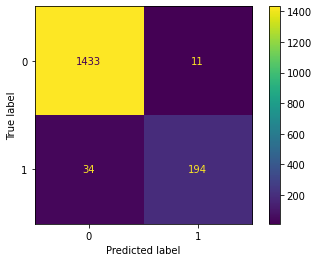

In [89]:
cm=confusion_matrix(y_true=mlp_sca_y_test, y_pred=c_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<h3>BOW

In [90]:
sca_x_bow_train,mlp_sca_x_bow_test,sca_y_bow_train,mlp_sca_y_bow_test=train_test_split(bow_obj_data[:,sf2],bow_obj_label,test_size=0.3,shuffle=False)
mlp_sca_bow_x_train,mlp_sca_bow_x_valid, mlp_sca_bow_y_train, mlp_sca_bow_y_valid = train_test_split(sca_x_bow_train, sca_y_bow_train,test_size=0.2,shuffle=False)


In [91]:
all_features2 = range(bow_obj_data.shape[1])
remaining_features2 = list(set(all_features2) - set(sf2))

In [92]:
sca_bow_x_train_remaining, mlp_bow_sca_x_test_remaining, sca_bow_y_train_remaining, mlp_sca_bow_y_test_remaining = train_test_split(bow_obj_data[:, remaining_features2],bow_obj_label,test_size=0.3,shuffle=False)
sca_bow_x_train_remaining,sca_bow_x_valid_remaining, sca_bow_y_train_remaining, sca_bow_y_valid_remaining = train_test_split(sca_bow_x_train_remaining, sca_bow_y_train_remaining,test_size=0.2,shuffle=False)

define complex model

In [93]:
input12=keras.layers.Input(shape=(mlp_sca_bow_x_train.shape[1],))
input22=keras.layers.Input(shape=(sca_bow_x_train_remaining.shape[1],))
hidden11=keras.layers.Dense(200,activation='relu')(input12)
hidden12=keras.layers.Dense(100,activation='relu')(input22)
concat2=keras.layers.concatenate([hidden11,hidden12])
output2=keras.layers.Dense(1,activation='sigmoid')(concat2)
cmodel2=keras.models.Model(inputs=[input12,input22],outputs=[output2])
cmodel2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
chistory2 = cmodel2.fit((mlp_sca_bow_x_train,sca_bow_x_train_remaining), mlp_sca_bow_y_train, validation_data=((mlp_sca_bow_x_valid,sca_bow_x_valid_remaining), mlp_sca_bow_y_valid), epochs=10, batch_size=32)
cscore2 = cmodel2.evaluate((mlp_sca_x_bow_test,mlp_bow_sca_x_test_remaining), mlp_sca_y_bow_test)

Epoch 1/10
98/98 [==============================] - 1s 6ms/step - loss: 0.3320 - accuracy: 0.9167 - val_loss: 0.1214 - val_accuracy: 0.9705
Epoch 2/10
98/98 [==============================] - 1s 5ms/step - loss: 0.0575 - accuracy: 0.9888 - val_loss: 0.0777 - val_accuracy: 0.9769
Epoch 3/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0221 - accuracy: 0.9958 - val_loss: 0.0728 - val_accuracy: 0.9782
Epoch 4/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 0.9978 - val_loss: 0.0727 - val_accuracy: 0.9808
Epoch 5/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0059 - accuracy: 0.9997 - val_loss: 0.0758 - val_accuracy: 0.9808
Epoch 6/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0786 - val_accuracy: 0.9808
Epoch 7/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0801 - val_accuracy: 0.9808
Epoch 8/10
98/98 [==

In [94]:
c_y_pred2= cmodel2.predict((mlp_sca_x_bow_test,mlp_bow_sca_x_test_remaining))

# Converting probabilities to class labels based on a threshold (e.g., 0.5)
c_y_pred2 = (c_y_pred2 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
cprecision2 = precision_score(y_true=mlp_sca_y_bow_test, y_pred=c_y_pred2)
crecall2 = recall_score(y_true=mlp_sca_y_bow_test, y_pred=c_y_pred2)
cf12 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=c_y_pred2)
caccuracy2 = accuracy_score(y_true=mlp_sca_y_bow_test, y_pred=c_y_pred2)

print("Accuracy:", caccuracy2)
print("Recall:", crecall2)
print("Precision:", cprecision2)
print("F1-score:", cf12)

53/53 [==============================] - 0s 2ms/step
Accuracy: 0.9802631578947368
Recall: 0.8552631578947368
Precision: 1.0
F1-score: 0.9219858156028369


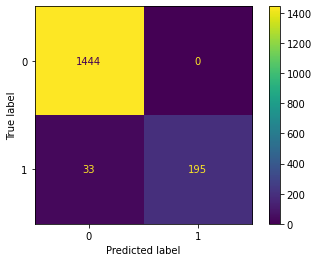

In [95]:
cm=confusion_matrix(y_true=mlp_sca_y_bow_test, y_pred=c_y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<h1>make result Table

In [96]:

results_mlp_56 = {'Algorithm': 'MLP-SCA', 'Accuracy_BOW': accuracy6*100 ,'Accuracy_TF-IDF':accuracy5*100 , 'Recall_BOW': recall6*100, 'Recall_TF-IDF': recall5*100,'Precision_BOW':precision6*100  ,'Precision_TF-IDF':precision5*100 ,'F-measure_BOW':f16*100,'F-measure_TF-IDF':f15*100}
results_nay_bag={'Algorithm': 'Bagging', 'Accuracy_BOW': gb_bow_bag_ac*100 ,'Accuracy_TF-IDF':gb_tf_bag_ac*100 , 'Recall_BOW': gb_bow_bag_re*100, 'Recall_TF-IDF': gb_tf_bag_re*100,'Precision_BOW':gb_bow_bag_per*100  ,'Precision_TF-IDF':gb_tf_bag_per*100 ,'F-measure_BOW':gb_bow_bag_f*100,'F-measure_TF-IDF':gb_tf_bag_f*100}
results_SCA_knn = {'Algorithm': 'KNN-SCA', 'Accuracy_BOW': SCA_knn_bow_accuracy*100 ,'Accuracy_TF-IDF':SCA_knn_tffi_accuracy*100 , 'Recall_BOW': SCA_knn_bow_recall*100, 'Recall_TF-IDF': SCA_knn_tffi_recall*100,'Precision_BOW':SCA_knn_bow_precision*100  ,'Precision_TF-IDF':SCA_knn_tffi_precision*100 ,'F-measure_BOW':SCA_knn_bow_f1*100,'F-measure_TF-IDF':SCA_knn_tffi_f1*100}
results_SCA_svm = {'Algorithm': 'SVM-SCA', 'Accuracy_BOW': SCA_bow_SVM_accuracy*100 ,'Accuracy_TF-IDF':SCA_tffi_SVM_accuracy*100 , 'Recall_BOW': SCA_bow_SVM_recall*100, 'Recall_TF-IDF': SCA_tffi_SVM_recall*100,'Precision_BOW':SCA_bow_SVM_precision*100  ,'Precision_TF-IDF':SCA_tffi_SVM_precision*100 ,'F-measure_BOW':SCA_bow_SVM_f1*100,'F-measure_TF-IDF':SCA_tffi_SVM_f1*100}
results_SCA_rf = {'Algorithm': 'R.forest-SCA', 'Accuracy_BOW': SCA_bow_Random_F_accuracy*100 ,'Accuracy_TF-IDF':SCA_tffi_Random_F_accuracy*100 , 'Recall_BOW': SCA_bow_Random_F_recall*100, 'Recall_TF-IDF': SCA_tffi_Random_F_recall*100,'Precision_BOW':SCA_bow_Random_F_precision*100  ,'Precision_TF-IDF':SCA_tffi_Random_F_precision*100 ,'F-measure_BOW':SCA_bow_Random_F_f1*100,'F-measure_TF-IDF':SCA_tffi_Random_F_f1*100}
results_Cmodel={'Algorithm': 'Complex-MLP', 'Accuracy_BOW': caccuracy2*100 ,'Accuracy_TF-IDF':caccuracy*100 , 'Precision_BOW':cprecision2*100  ,'Precision_TF-IDF':cprecision*100 ,'Recall_BOW':crecall2*100, 'Recall_TF-IDF':crecall*100,'F-measure_BOW':cf12*100,'F-measure_TF-IDF':cf1*100}
results_SCA_NB = {'Algorithm': 'Naive Bayes-SCA', 'Accuracy_BOW': gb_bow_bag_ac*100 ,'Accuracy_TF-IDF':gb_tf_SCA_ac*100 , 'Recall_BOW': gb_bow_bag_re*100, 'Recall_TF-IDF': gb_tf_SCA_re*100,'Precision_BOW':gb_bow_bag_per*100  ,'Precision_TF-IDF':gb_tf_SCA_per*100 ,'F-measure_BOW':gb_bow_bag_f*100,'F-measure_TF-IDF':gb_tf_SCA_f*100}
results_votting2={'Algorithm': 'Vot (SVM,KNN,RF)', 'Accuracy_BOW': ens4_accuracy*100 ,'Accuracy_TF-IDF':ens1_accuracy*100 , 'Recall_BOW': ens4_recall*100, 'Recall_TF-IDF': ens1_recall*100,'Precision_BOW':ens4_precision*100  ,'Precision_TF-IDF':ens1_precision*100 ,'F-measure_BOW':ens4_f1*100,'F-measure_TF-IDF':ens1_f1*100}

df = pd.DataFrame([results_mlp_56,results_SCA_knn,results_SCA_svm ,results_SCA_rf,results_SCA_NB,results_votting2,results_nay_bag,results_Cmodel])
df.set_index('Algorithm', inplace=True)
columns = pd.MultiIndex.from_tuples([
    ('Accuracy', 'BOW'), ('Accuracy', 'TF-IDF'),
    ('Recall', 'BOW'), ('Recall', 'TF-IDF'),
    ('Precision', 'BOW'), ('Precision', 'TF-IDF'),
    
    ('F-measure', 'BOW'), ('F-measure', 'TF-IDF')
])

df.columns = columns

# Define column spacing
col_width = max(len(name) for name in df.columns.get_level_values(0))
level_width = max(len(str(level)) for level in df.columns.get_level_values(1))
spacing = 2  # Number of extra spaces between columns

# Function to format column headers with adjusted spacing
def format_columns(columns):
    return [f"{col:{col_width}s}{level:>{level_width + spacing}s}" for col, level in columns]

# Format columns with adjusted spacing
df.columns = format_columns(df.columns)

# Display the DataFrame
df

,Accuracy BOW,Accuracy TF-IDF,Recall BOW,Recall TF-IDF,Precision BOW,Precision TF-IDF,F-measure BOW,F-measure TF-IDF
Algorithm,,,,,,,,
MLP-SCA,96.889952,95.633971,81.250000,87.946429,94.791667,81.069959,87.500000,84.368308
KNN-SCA,88.337321,86.722488,12.946429,0.892857,100.000000,100.000000,22.924901,1.769912
SVM-SCA,96.830144,90.071770,78.571429,25.892857,97.237569,100.000000,86.913580,41.134752
R.forest-SCA,96.411483,97.667464,74.107143,83.928571,98.809524,98.429319,84.693878,90.602410
Naive Bayes-SCA,77.811005,72.129187,91.517857,88.392857,36.804309,31.034483,52.496799,45.939675
"Vot (SVM,KNN,RF)",97.368421,97.787081,80.357143,83.482143,100.000000,100.000000,89.108911,90.997567
Bagging,77.811005,93.361244,91.517857,85.267857,36.804309,71.003717,52.496799,77.484787
Complex-MLP,98.026316,97.308612,85.526316,85.087719,100.000000,94.634146,92.198582,89.607390
